In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:\\Users\\nalla\\Desktop\\Data Files\\train_loan.csv")
df

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [3]:
df=df.drop(['id'],axis=1)

In [4]:
lbf=LabelEncoder()
df=df.apply(lbf.fit_transform)

In [5]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,17,381,3,0,1,1,164,119,17,0,12,0
1,2,1129,2,6,3,2,97,178,7,0,0,0
2,9,191,2,8,4,0,164,49,21,0,8,0
3,10,1599,3,14,5,1,331,108,17,0,3,0
4,2,1285,3,2,3,0,164,14,10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,14,2348,0,5,1,3,522,267,21,1,8,0
58641,8,191,3,0,3,2,282,156,35,0,6,1
58642,3,659,3,7,1,3,191,270,15,0,0,1
58643,2,238,3,2,1,0,129,49,17,0,1,0


<Axes: xlabel='loan_status', ylabel='count'>

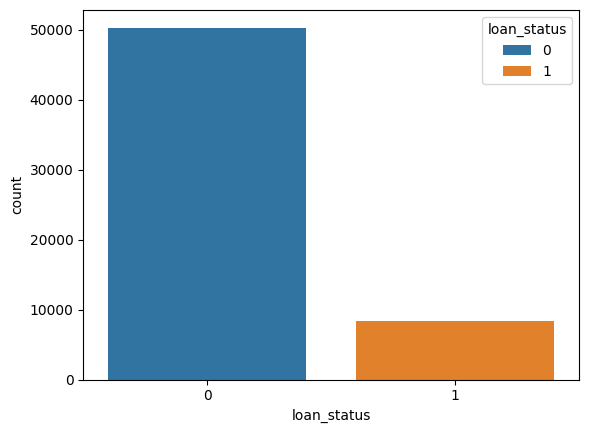

In [6]:
sns.countplot(data=df,x='loan_status',hue='loan_status')

In [7]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

oversampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled_train, y_resampled_train = oversampler.fit_resample(X_train, y_train)
X_resampled_val, y_resampled_val = oversampler.fit_resample(X_val, y_val)

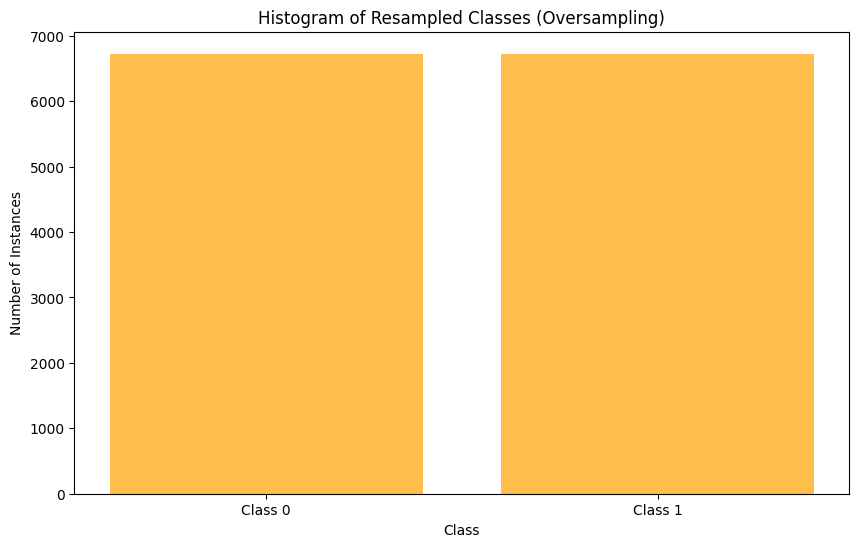

In [10]:
plt.figure(figsize=(10,6))
plt.hist(y_resampled_train,bins=range(3),align='left',rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])
plt.show()

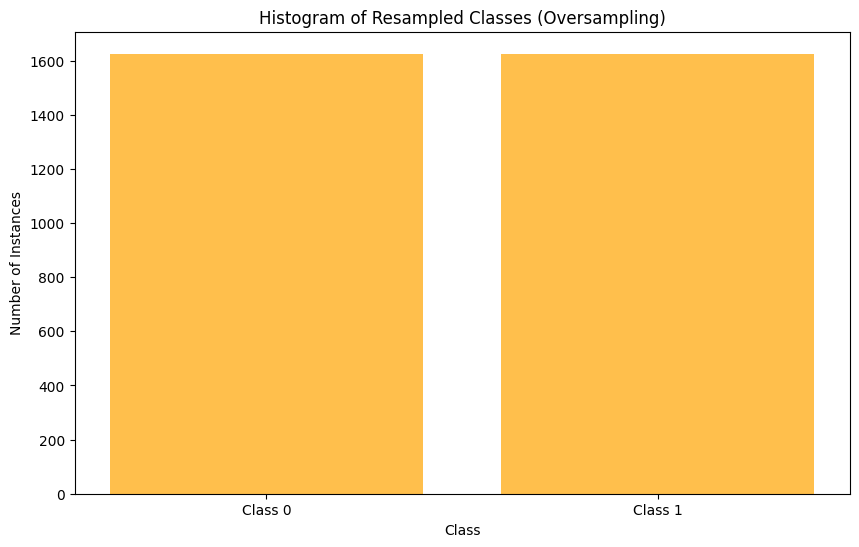

In [11]:
plt.figure(figsize=(10,6))
plt.hist(y_resampled_val,bins=range(3),align='left',rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])
plt.show()

In [12]:
lr=LogisticRegression()

In [13]:
lr.fit(X_resampled_train,y_resampled_train)

C:\Users\nalla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_pred=lr.predict(X_resampled_val)

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_resampled_val)

0.785670356703567

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc=RandomForestClassifier()

In [18]:
rfc.fit(X_resampled_train,y_resampled_train)

RandomForestClassifier()

In [19]:
y_pred=rfc.predict(X_resampled_val)

In [20]:
accuracy_score(y_pred,y_resampled_val)

0.8628536285362853

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_pred,y_resampled_val))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1804
           1       0.81      0.91      0.85      1448

    accuracy                           0.86      3252
   macro avg       0.86      0.87      0.86      3252
weighted avg       0.87      0.86      0.86      3252



In [23]:
print(X_resampled_train.shape)
print(y_resampled_train.shape)

(13448, 11)
(13448,)


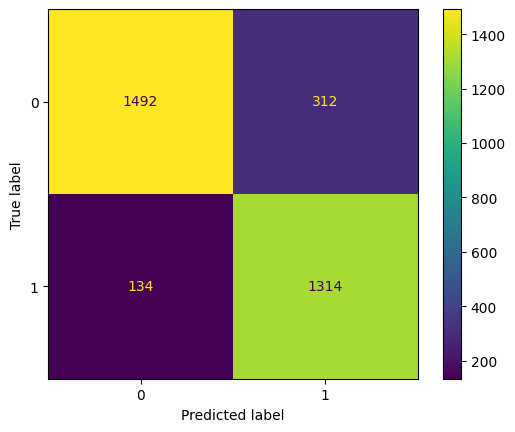

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm=confusion_matrix(y_pred,y_resampled_val)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()

In [25]:
dftest=pd.read_csv("C:\\Users\\nalla\\Desktop\\Data Files\\test_loan.csv")
dftest

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [26]:
dftest=dftest.drop(['id'],axis=1)

In [27]:
lbf=LabelEncoder()
dftest=dftest.apply(lbf.fit_transform)

In [28]:
dftest

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,3,1310,3,3,2,5,462,245,36,0,0
1,6,1772,0,6,4,2,254,149,10,1,2
2,6,210,3,5,5,4,91,274,13,1,0
3,13,765,3,4,0,0,180,49,14,0,5
4,6,1834,0,8,2,3,357,256,15,1,2
...,...,...,...,...,...,...,...,...,...,...,...
39093,2,233,0,2,0,1,57,83,10,0,2
39094,2,690,0,6,1,0,180,7,15,0,1
39095,31,1084,0,0,4,0,357,28,25,0,23
39096,2,362,0,4,4,3,337,241,39,1,2


In [29]:
X_test,y_test=train_test_split(dftest)

In [30]:
dfsub=pd.read_csv("C:\\Users\\nalla\\Desktop\\Data Files\\sample_submission_loan.csv")
dfsub

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5
...,...,...
39093,97738,0.5
39094,97739,0.5
39095,97740,0.5
39096,97741,0.5


In [31]:
test_predictions = rfc.predict(dftest)
dfsub["loan_status"] = test_predictions

In [32]:
print(dfsub.head())

      id  loan_status
0  58645            1
1  58646            0
2  58647            1
3  58648            0
4  58649            1


In [33]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds=roc_curve(y_pred,y_resampled_val)
roc_auc=auc(fpr,tpr)

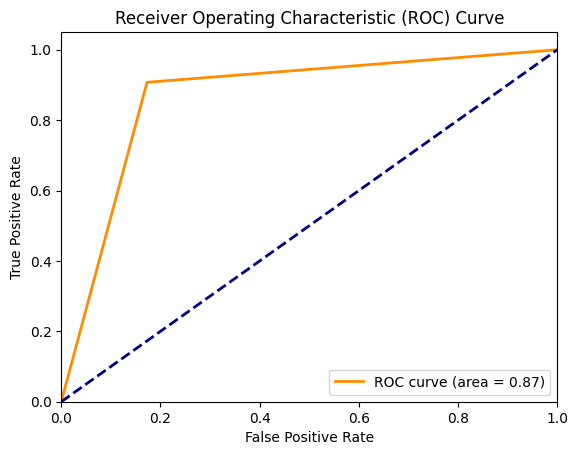

In [34]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_resampled_train=scaler.fit_transform(X_resampled_train)
# X_val=scaler.transform(X_val)

In [36]:
import keras
import tensorflow as tf
from keras.layers import Dense, Dropout

In [37]:
ann = tf.keras.models.Sequential()

In [38]:
ann.add(tf.keras.layers.Dense(units=40,activation="sigmoid"))

In [39]:
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))

In [40]:
ann.add(tf.keras.layers.Dense(units=32,activation="relu"))

In [41]:
ann.add(tf.keras.layers.Dense(units=50,activation="relu"))

In [42]:
ann.add(tf.keras.layers.Dense(units=20,activation="relu"))

In [43]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [44]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(X_resampled_train,y_resampled_train,batch_size=56,epochs = 1000)

Epoch 1/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7327 - loss: 0.5636
Epoch 2/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7434 - loss: 0.5239
Epoch 3/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7466 - loss: 0.5154
Epoch 4/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7503 - loss: 0.5237
Epoch 5/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7521 - loss: 0.5139
Epoch 6/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7520 - loss: 0.5114
Epoch 7/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7563 - loss: 0.5141
Epoch 8/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7555 - loss: 0.5088
Epoch 9/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7466 - loss: 0.5151
Epoch 10/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7605 - loss: 0.5067
Epoch 11/1000
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7594 - loss: 0.5045
Epoch 12/1000
241/241 ━━━━━━━━

In [48]:
y_pred=ann.predict(X_resampled_val)

prediction_p = tf.nn.softmax(y_pred).numpy()
yhat = np.argmax(prediction_p)
yhat

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0